In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data = pd.read_excel('data-logistic.xlsx')

In [75]:
data.head()

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
0,2020-02-01,IN,01:01:00,G2,Gudang Regional PMI_Serang,NaN,Masker Bedah,NaN,Sensi,Pcs,350000.0,NaN,Rp7.000,Rp2.450.000.000,0.006,2100.0
1,2020-02-01,OUT,01:01:00,G2,Ketua Umum,NaN,Masker N95,NaN,3M,Pcs,NaN,800,Rp108.240,Rp86.592.000,0.040,32.0
2,2020-02-01,OUT,01:02:00,G2,PMI Kabupaten Natuna,NaN,Masker Bedah,NaN,Sensi,Pcs,NaN,20000,Rp7.000,Rp140.000.000,0.006,120.0
3,2020-02-05,OUT,05:01:00,G2,Palang Merah Hongkong,NaN,Masker Bedah,NaN,Sensi,Pcs,NaN,50000,Rp7.000,Rp350.000.000,0.006,300.0
4,2020-02-05,OUT,05:02:00,G2,Lain-lain,NaN,Masker Bedah,NaN,Sensi,Pcs,NaN,4000,Rp7.000,Rp28.000.000,0.006,24.0


In [76]:
print(data.shape)

(8189, 16)


In [77]:
data.dtypes

tanggal               datetime64[ns]
in_out                        object
gdn_grn                       object
gudang                        object
dari_kpd_masking              object
provinsi                     float64
nama_barang                   object
kelompok_barang              float64
merk_jenis_deleted            object
satuan                        object
masuk                        float64
keluar                        object
nilai                         object
jumlah                        object
berat                        float64
total_berat                  float64
dtype: object

In [78]:
# data.gdn_grn.unique()

In [79]:
len(data.gdn_grn.unique())

984

In [80]:
data.gudang.unique()

array(['G2', 'G1', 'G5', 'G3', 'G6', 'G7', 'G4'], dtype=object)

In [81]:
len(data.dari_kpd_masking.unique())

390

In [82]:
# data.dari_kpd_masking.unique()

In [83]:
for i in range(0, len(data.provinsi)):
    if any(x in data.dari_kpd_masking[i] for x in ['Serang', 'Tangerang', 'Tanggerang','Banten']):
        data.provinsi.loc[i] = 'Banten'
    elif any(x in data.dari_kpd_masking[i] for x in ['Aceh']):
        data.provinsi.loc[i] = 'Aceh'
    elif any(x in data.dari_kpd_masking[i] for x in ['Medan', 'Binjai', 'Deli Serdang', 'Sumatera Utara']):
        data.provinsi.loc[i] = 'Sumatera Utara'
    elif any(x in data.dari_kpd_masking[i] for x in ['Padang', 'Sumatera Barat']):
        data.provinsi.loc[i] = 'Sumatera Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Palembang', 'Lahat', 'Sumatera Selatan']):
        data.provinsi.loc[i] = 'Sumatera Selatan'
    elif any(x in data.dari_kpd_masking[i] for x in ['Lampung']):
        data.provinsi.loc[i] = 'Lampung'
    elif any(x in data.dari_kpd_masking[i] for x in ['Bangka', 'Belitung', 'Bangka Belitung']):
        data.provinsi.loc[i] = 'Bangka Belitung'
    elif any(x in data.dari_kpd_masking[i] for x in ['Bengkulu']):
        data.provinsi.loc[i] = 'Bengkulu'
    elif any(x in data.dari_kpd_masking[i] for x in ['Natuna', 'Batam', 'Bintan', 'Tanjung Pinang', 'Kepulauan Riau']):
        data.provinsi.loc[i] = 'Kepulauan Riau'
    elif any(x in data.dari_kpd_masking[i] for x in ['Provinsi Riau']):
        data.provinsi.loc[i] = 'Riau'
    elif any(x in data.dari_kpd_masking[i] for x in ['Depok', 'Bogor', 'Bekasi', 'Bandung', 'Garut', 'Sukabumi', 'Cirebon', 'Cianjur', 'Karawang', 'Kota Banjar', 'Sumedang', 'Tasikmalaya', 'Cimahi', 'Subang', 'Ciamis', 'Jawa Barat']):
        data.provinsi.loc[i] = 'Jawa Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Semarang', 'Kebumen', 'Pati', 'Brebes', 'Wonogiri', 'Surakarta', 'Tegal', 'Banyumas', 'Jawa Tengah']):
        data.provinsi.loc[i] = 'Jawa Tengah'
    elif any(x in data.dari_kpd_masking[i] for x in ['DI Yogyakarta']):
        data.provinsi.loc[i] = 'Yogyakarta'
    elif any(x in data.dari_kpd_masking[i] for x in ['Surabaya', 'Sidoarjo', 'Gresik', 'Malang', 'Situbondo', 'Tulungagung', 'Lumajang', 'Probolinggo', 'Banyuwangi', 'Lamongan', 'Magetan', 'Jawa Timur']):
        data.provinsi.loc[i] = 'Jawa Timur'
    elif any(x in data.dari_kpd_masking[i] for x in ['Kalimantan Utara']):
        data.provinsi.loc[i] = 'Kalimantan Utara'
    elif any(x in data.dari_kpd_masking[i] for x in ['Kotawaringin', 'Pati', 'Kalimantan Tengah']):
        data.provinsi.loc[i] = 'Kalimantan Tengah'
    elif any(x in data.dari_kpd_masking[i] for x in ['Kalimantan Barat']):
        data.provinsi.loc[i] = 'Kalimantan Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Kalimantan Timur']):
        data.provinsi.loc[i] = 'Kalimantan Timur'
    elif any(x in data.dari_kpd_masking[i] for x in ['Banjarmasin', 'Kalimantan Selatan']):
        data.provinsi.loc[i] = 'Kalimantan Selatan'
    elif any(x in data.dari_kpd_masking[i] for x in ['Manado', 'Sulawesi Utara']):
        data.provinsi.loc[i] = 'Sulawesi Utara'
    elif any(x in data.dari_kpd_masking[i] for x in ['Gorontalo']):
        data.provinsi.loc[i] = 'Gorontalo'
    elif any(x in data.dari_kpd_masking[i] for x in ['Poso', 'Banggai', 'Sulawesi Tengah']):
        data.provinsi.loc[i] = 'Sulawesi Tengah'
    elif any(x in data.dari_kpd_masking[i] for x in ['Mamuju', 'Sulawesi Barat']):
        data.provinsi.loc[i] = 'Sulawesi Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Makasar', 'Makassar', 'Sulawesi Selatan']):
        data.provinsi.loc[i] = 'Sulawesi Selatan'
    elif any(x in data.dari_kpd_masking[i] for x in ['Maluku Utara']):
        data.provinsi.loc[i] = 'Maluku Utara'
    elif any(x in data.dari_kpd_masking[i] for x in ['Ambon', 'Maluku']):
        data.provinsi.loc[i] = 'Maluku'
    elif any(x in data.dari_kpd_masking[i] for x in ['Bali']):
        data.provinsi.loc[i] = 'Bali'
    elif any(x in data.dari_kpd_masking[i] for x in ['Rote Ndao', 'Lembata', 'Sikka', 'Ende', 'Nusa Tenggara Timur']):
        data.provinsi.loc[i] = 'Nusa Tenggara Timur'
    elif any(x in data.dari_kpd_masking[i] for x in ['Lombok', 'Nusa Tenggara Barat']):
        data.provinsi.loc[i] = 'Nusa Tenggara Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Papua Barat']):
        data.provinsi.loc[i] = 'Papua Barat'
    elif any(x in data.dari_kpd_masking[i] for x in ['Mimika', 'Papua']):
        data.provinsi.loc[i] = 'Papua'
    else:
        data.provinsi.loc[i] = 'Jakarta Raya'
    

/Users/kartikarizqinastiti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

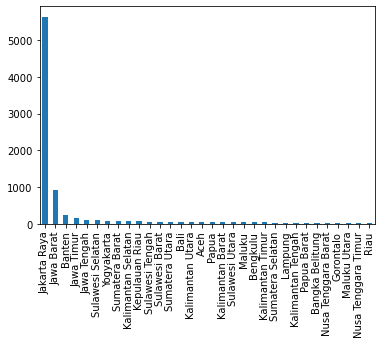

In [84]:
data.provinsi.value_counts().plot(kind='bar')

In [85]:
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
tanggal,tanggal,0.000000
in_out,in_out,0.000000
gdn_grn,gdn_grn,0.012212
gudang,gudang,0.000000
dari_kpd_masking,dari_kpd_masking,0.000000
provinsi,provinsi,0.000000
nama_barang,nama_barang,0.000000
kelompok_barang,kelompok_barang,100.000000
merk_jenis_deleted,merk_jenis_deleted,46.953230
satuan,satuan,0.024423


In [86]:
data.head(20)

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
0,2020-02-01,IN,01:01:00,G2,Gudang Regional PMI_Serang,Banten,Masker Bedah,NaN,Sensi,Pcs,350000.0,NaN,Rp7.000,Rp2.450.000.000,0.006,2100.00
1,2020-02-01,OUT,01:01:00,G2,Ketua Umum,Jakarta Raya,Masker N95,NaN,3M,Pcs,NaN,800,Rp108.240,Rp86.592.000,0.040,32.00
2,2020-02-01,OUT,01:02:00,G2,PMI Kabupaten Natuna,Kepulauan Riau,Masker Bedah,NaN,Sensi,Pcs,NaN,20000,Rp7.000,Rp140.000.000,0.006,120.00
3,2020-02-05,OUT,05:01:00,G2,Palang Merah Hongkong,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,50000,Rp7.000,Rp350.000.000,0.006,300.00
4,2020-02-05,OUT,05:02:00,G2,Lain-lain,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,4000,Rp7.000,Rp28.000.000,0.006,24.00
5,2020-02-05,OUT,05:02:00,G2,Lain-lain,Jakarta Raya,Masker N95,NaN,3M,Pcs,NaN,1000,Rp108.240,Rp108.240.000,0.040,40.00
6,2020-02-05,OUT,05:03:00,G2,Staff MP PMI,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,200,Rp7.000,Rp1.400.000,0.006,1.20
7,2020-02-11,OUT,11:01:00,G2,Individu,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,100,Rp7.000,Rp700.000,0.006,0.60
8,2020-02-12,OUT,12:01:00,G2,Individu,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,100,Rp7.000,Rp700.000,0.006,0.60
9,2020-02-14,OUT,14:01:00,G2,Staff MP PMI,Jakarta Raya,Masker Bedah,NaN,Sensi,Pcs,NaN,100,Rp7.000,Rp700.000,0.006,0.60


In [87]:
data.to_csv('data-logistic-prov.csv')

In [88]:
data.nama_barang.unique()

array(['Masker Bedah', 'Masker N95', 'Hazmat', 'Kacamata', 'Sepatu Boot',
       'Virkon', 'Disinfektan 5 Liter', 'Sarung Tangan Karet', 'Sprayer',
       'Hand Sanitizer Saku', 'Hand Sanitizer 500 ml',
       'Hand Sanitizer 5 Liter', 'Disinfektan 20 Liter',
       'Masker Respirator', 'Terpal', 'Sarung Tangan Latex',
       'Hand Sanitizer 1 Liter', 'Hand Sanitizer 20 Liter',
       'Tandon Air 300 lt', 'Kaporit', 'Jas Hujan ', 'Kompresor Set',
       'Air Mineral Botol', 'Wipol', 'Rompi PMI', 'Matras Gulung',
       'Masker Kain', 'Sabun Lifebouy', 'Teh Celup Sariwangi',
       'Paper Bag PHBS', 'Paket PHBS', 'Mie Instan',
       'My Baby Minyak Telon Plus', 'Sabun Marina', 'Sabun Claudia',
       'Obat - Bodrexin Batuk Pilek', 'Obat - Bodrexin Flu PE',
       'Obat - Vidoran Gummy Frugi E ND', 'Susu Vidoran',
       "Obat - Vidoran Smart Sberry 25's", 'Obat - Contrexyn Tablet',
       'Vitamin - IPI B Complex', 'Obat - Vidoran Gummy 54 gr',
       'Hemaviton Energy Drink', 'Obat - 

In [89]:
len(data.nama_barang.unique())

228

In [90]:
for i in range(0, len(data.kelompok_barang)):
    if any(x in data.nama_barang[i] for x in ['Masker', 'Hazmat', 'Kacamata', 'Sepatu Boot', 'Sarung Tangan', 'Face Shield', 'Head Cap']):
        data.kelompok_barang.loc[i] = 'Alat Pelindung Diri'
    elif any(x in data.nama_barang[i] for x in ['Virkon', 'Disinfektan', 'Hand Sanitizer', 'Kaporit', 'Wipol', 'Biosol', 'Hit Aerosol']):
        data.kelompok_barang.loc[i] = 'Bahan Kimia'
    elif any(x in data.nama_barang[i] for x in ['Kantong Mayat', 'Hansaplast', 'Tisu Basah']):
        data.kelompok_barang.loc[i] = 'Kebutuhan Medis'
    elif any(x in data.nama_barang[i] for x in ['Tandon', 'Sabun', 'Tisu Basah', 'Hygiene Kit', 'Soap', 'Pasta Gigi', 'Sikat Gigi', 'Shampo', 'Detergen', 'Pembalut', 'Sunlight', 'Handuk']):
        data.kelompok_barang.loc[i] = 'Kebutuhan MCK'
    elif any(x in data.nama_barang[i] for x in ['Mie', 'Minyak', 'Biskuit', 'Food Kit', 'Sembako', 'Koko Krunch', 'Simba', 'Khong Guan', 'MD Cream Cracker', 'Assortment', 'Dovie', 'Fine Choco', 'Cerelac', 'Bubur', 'Wafer', 'Beras', 'Gula', 'Makanan', 'Roti', 'Snack', 'Saos', 'Kecap', 'Sarden', 'Cookies', 'Roma Malkies', 'Momogi']):
        data.kelompok_barang.loc[i] = 'Makanan'
    elif any(x in data.nama_barang[i] for x in ['Air Mineral', 'Teh', 'Buavita', 'Susu', 'Nescafe', 'Kopi', 'Energen', 'Milk']):
        data.kelompok_barang.loc[i] = 'Minuman'
    elif any(x in data.nama_barang[i] for x in ['Obat', 'Hemaviton', 'Suplemen', 'Vitamin']):
        data.kelompok_barang.loc[i] = 'Obat dan Suplemen'
    elif any(x in data.nama_barang[i] for x in ['Kompresor Set', 'Ventilator', 'Termometer', 'Alat Rapid Test', 'USG']):
        data.kelompok_barang.loc[i] = 'Peralatan Penunjang Medis'
    elif any(x in data.nama_barang[i] for x in ['Shirt', 'Uniqlo', 'Clothes', 'Popok', 'Pakaian', 'Underware', 'Sandal', 'Kemeja']):
        data.kelompok_barang.loc[i] = 'Pakaian'
    else:
        data.kelompok_barang.loc[i] = 'Lainnya'

/Users/kartikarizqinastiti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [91]:
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
tanggal,tanggal,0.000000
in_out,in_out,0.000000
gdn_grn,gdn_grn,0.012212
gudang,gudang,0.000000
dari_kpd_masking,dari_kpd_masking,0.000000
provinsi,provinsi,0.000000
nama_barang,nama_barang,0.000000
kelompok_barang,kelompok_barang,0.000000
merk_jenis_deleted,merk_jenis_deleted,46.953230
satuan,satuan,0.024423


<AxesSubplot:>

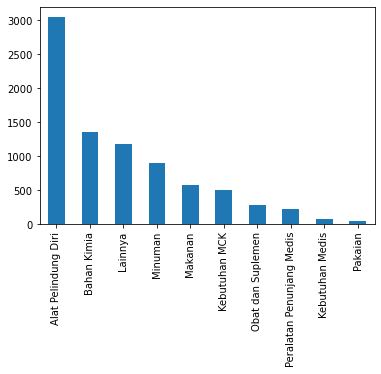

In [92]:
data.kelompok_barang.value_counts().plot(kind='bar')

In [93]:
data.head()

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
0,2020-02-01,IN,01:01:00,G2,Gudang Regional PMI_Serang,Banten,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,350000.0,NaN,Rp7.000,Rp2.450.000.000,0.006,2100.0
1,2020-02-01,OUT,01:01:00,G2,Ketua Umum,Jakarta Raya,Masker N95,Alat Pelindung Diri,3M,Pcs,NaN,800,Rp108.240,Rp86.592.000,0.040,32.0
2,2020-02-01,OUT,01:02:00,G2,PMI Kabupaten Natuna,Kepulauan Riau,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,20000,Rp7.000,Rp140.000.000,0.006,120.0
3,2020-02-05,OUT,05:01:00,G2,Palang Merah Hongkong,Jakarta Raya,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,50000,Rp7.000,Rp350.000.000,0.006,300.0
4,2020-02-05,OUT,05:02:00,G2,Lain-lain,Jakarta Raya,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,4000,Rp7.000,Rp28.000.000,0.006,24.0


In [94]:
# data['nilai'] = data['nilai'].map(lambda x: x.lstrip('Rp'))

In [95]:
# data['nilai'] = data['nilai'].astype(str).str.replace('[R,p,.]', '')
# data['jumlah'] = data['jumlah'].astype(str).str.replace('Rp', '')

In [96]:
data_new = data.copy()

In [97]:
data_new.head()

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
0,2020-02-01,IN,01:01:00,G2,Gudang Regional PMI_Serang,Banten,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,350000.0,NaN,Rp7.000,Rp2.450.000.000,0.006,2100.0
1,2020-02-01,OUT,01:01:00,G2,Ketua Umum,Jakarta Raya,Masker N95,Alat Pelindung Diri,3M,Pcs,NaN,800,Rp108.240,Rp86.592.000,0.040,32.0
2,2020-02-01,OUT,01:02:00,G2,PMI Kabupaten Natuna,Kepulauan Riau,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,20000,Rp7.000,Rp140.000.000,0.006,120.0
3,2020-02-05,OUT,05:01:00,G2,Palang Merah Hongkong,Jakarta Raya,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,50000,Rp7.000,Rp350.000.000,0.006,300.0
4,2020-02-05,OUT,05:02:00,G2,Lain-lain,Jakarta Raya,Masker Bedah,Alat Pelindung Diri,Sensi,Pcs,NaN,4000,Rp7.000,Rp28.000.000,0.006,24.0


In [98]:
data_new[data_new.nama_barang.str.contains('jas hujan',case=False)]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
1053,2020-03-22,OUT,22:05:00,G1,PMI Kota Banjar,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,10,Rp121.000,Rp1.210.000,0.80,8.00
1095,2020-03-22,OUT,22:13:00,G1,Tim Logistik,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,45,Rp121.000,Rp5.445.000,0.80,36.00
1096,2020-03-23,OUT,23:01:00,G1,Pelatihan,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,Rp121.000,Rp242.000,0.80,1.60
1136,2020-03-23,OUT,23:08:00,G1,Paspampres,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,12,Rp121.000,Rp1.452.000,0.80,9.60
1174,2020-03-23,OUT,23:15:00,G1,PMI Kabupaten Ciamis,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,Rp121.000,Rp242.000,0.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,2021-02-12,OUT,12:01:00,G1,PMI Kabupaten Bekasi,Jawa Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,30,"Rp150.000,00",Rp4.500.000,0.05,1.50
7545,2021-02-18,OUT,18:02:00,G1,MP PMI,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,1,"Rp150.000,00",Rp150.000,0.05,0.05
7557,2021-02-19,OUT,19:03:00,G1,Tim Gunner,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,22,"Rp150.000,00",Rp3.300.000,0.05,1.10
7562,2021-02-19,OUT,19:05:00,G1,PMI Provinsi Sulawesi Barat,Sulawesi Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,25,"Rp150.000,00",Rp3.750.000,0.05,1.25


In [99]:
# for i in range(0, len(data.nilai)):
# #     if any(x in data.dari_kpd_masking[i] for x in ['Serang', 'Tangerang', 'Tanggerang','Banten']):
#     if data.nilai[i][-3] == ',':
#         data.nilai.loc[i] = data.nilai[:-n-3]

In [100]:
data_new['nilai'] = data_new['nilai'].str.replace(',00', '')
data_new['jumlah'] = data_new['jumlah'].str.replace(',00', '')

In [101]:
data_new[data_new.nama_barang.str.contains('jas hujan',case=False)]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
1053,2020-03-22,OUT,22:05:00,G1,PMI Kota Banjar,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,10,Rp121.000,Rp1.210.000,0.80,8.00
1095,2020-03-22,OUT,22:13:00,G1,Tim Logistik,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,45,Rp121.000,Rp5.445.000,0.80,36.00
1096,2020-03-23,OUT,23:01:00,G1,Pelatihan,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,Rp121.000,Rp242.000,0.80,1.60
1136,2020-03-23,OUT,23:08:00,G1,Paspampres,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,12,Rp121.000,Rp1.452.000,0.80,9.60
1174,2020-03-23,OUT,23:15:00,G1,PMI Kabupaten Ciamis,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,Rp121.000,Rp242.000,0.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,2021-02-12,OUT,12:01:00,G1,PMI Kabupaten Bekasi,Jawa Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,30,Rp150.000,Rp4.500.000,0.05,1.50
7545,2021-02-18,OUT,18:02:00,G1,MP PMI,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,1,Rp150.000,Rp150.000,0.05,0.05
7557,2021-02-19,OUT,19:03:00,G1,Tim Gunner,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,22,Rp150.000,Rp3.300.000,0.05,1.10
7562,2021-02-19,OUT,19:05:00,G1,PMI Provinsi Sulawesi Barat,Sulawesi Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,25,Rp150.000,Rp3.750.000,0.05,1.25


In [102]:
data_new['nilai'] = data_new['nilai'].str.replace(r'\D+', '')
data_new['jumlah'] = data_new['jumlah'].str.replace(r'\D+', '')

<ipython-input-102-8e3aae82d337>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_new['nilai'] = data_new['nilai'].str.replace(r'\D+', '')
<ipython-input-102-8e3aae82d337>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_new['jumlah'] = data_new['jumlah'].str.replace(r'\D+', '')


In [103]:
data_new['nilai'] = data_new['nilai'].astype(float)
# data_new['jumlah'] = data_new['jumlah'].astype(float)

In [104]:
percent_missing = data_new.isna().sum() * 100 / len(data_new)
missing_value_df = pd.DataFrame({'column_name': data_new.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
tanggal,tanggal,0.000000
in_out,in_out,0.000000
gdn_grn,gdn_grn,0.012212
gudang,gudang,0.000000
dari_kpd_masking,dari_kpd_masking,0.000000
provinsi,provinsi,0.000000
nama_barang,nama_barang,0.000000
kelompok_barang,kelompok_barang,0.000000
merk_jenis_deleted,merk_jenis_deleted,46.953230
satuan,satuan,0.024423


In [105]:
data_new[data_new.nama_barang.str.contains('jas hujan',case=False)]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
1053,2020-03-22,OUT,22:05:00,G1,PMI Kota Banjar,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,10,121000.0,1210000,0.80,8.00
1095,2020-03-22,OUT,22:13:00,G1,Tim Logistik,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,45,121000.0,5445000,0.80,36.00
1096,2020-03-23,OUT,23:01:00,G1,Pelatihan,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,121000.0,242000,0.80,1.60
1136,2020-03-23,OUT,23:08:00,G1,Paspampres,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,12,121000.0,1452000,0.80,9.60
1174,2020-03-23,OUT,23:15:00,G1,PMI Kabupaten Ciamis,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,121000.0,242000,0.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,2021-02-12,OUT,12:01:00,G1,PMI Kabupaten Bekasi,Jawa Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,30,150000.0,4500000,0.05,1.50
7545,2021-02-18,OUT,18:02:00,G1,MP PMI,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,1,150000.0,150000,0.05,0.05
7557,2021-02-19,OUT,19:03:00,G1,Tim Gunner,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,22,150000.0,3300000,0.05,1.10
7562,2021-02-19,OUT,19:05:00,G1,PMI Provinsi Sulawesi Barat,Sulawesi Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,25,150000.0,3750000,0.05,1.25


In [106]:
data_new.dtypes

tanggal               datetime64[ns]
in_out                        object
gdn_grn                       object
gudang                        object
dari_kpd_masking              object
provinsi                      object
nama_barang                   object
kelompok_barang               object
merk_jenis_deleted            object
satuan                        object
masuk                        float64
keluar                        object
nilai                        float64
jumlah                        object
berat                        float64
total_berat                  float64
dtype: object

In [107]:
data_new.to_csv('data-input.csv')

In [108]:
data_new.to_excel('data-preprocessed.xlsx')

In [109]:
data_new[data_new['nama_barang'].str.contains('jas hujan')]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat


In [110]:
data_new[data_new['nama_barang'].str.match('jas hujan')]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat


In [111]:
data_new[data_new.nama_barang.str.contains('jas hujan',case=False)]

,tanggal,in_out,gdn_grn,gudang,dari_kpd_masking,provinsi,nama_barang,kelompok_barang,merk_jenis_deleted,satuan,masuk,keluar,nilai,jumlah,berat,total_berat
1053,2020-03-22,OUT,22:05:00,G1,PMI Kota Banjar,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,10,121000.0,1210000,0.80,8.00
1095,2020-03-22,OUT,22:13:00,G1,Tim Logistik,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,45,121000.0,5445000,0.80,36.00
1096,2020-03-23,OUT,23:01:00,G1,Pelatihan,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,121000.0,242000,0.80,1.60
1136,2020-03-23,OUT,23:08:00,G1,Paspampres,Jakarta Raya,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,12,121000.0,1452000,0.80,9.60
1174,2020-03-23,OUT,23:15:00,G1,PMI Kabupaten Ciamis,Jawa Barat,Jas Hujan,Lainnya,3 Layer,Pcs,NaN,2,121000.0,242000,0.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,2021-02-12,OUT,12:01:00,G1,PMI Kabupaten Bekasi,Jawa Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,30,150000.0,4500000,0.05,1.50
7545,2021-02-18,OUT,18:02:00,G1,MP PMI,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,1,150000.0,150000,0.05,0.05
7557,2021-02-19,OUT,19:03:00,G1,Tim Gunner,Jakarta Raya,Jas Hujan,Lainnya,NaN,Pcs,NaN,22,150000.0,3300000,0.05,1.10
7562,2021-02-19,OUT,19:05:00,G1,PMI Provinsi Sulawesi Barat,Sulawesi Barat,Jas Hujan,Lainnya,NaN,Pcs,NaN,25,150000.0,3750000,0.05,1.25
